# **Linear Regression**

**Imports**

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

**Loading Dataset**

In [30]:
df = pd.read_csv("../Datasets/energy_efficiency.csv")

df.head()

,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_distribution,heating_load,cooling_load
0,0.98,514.5,294.0,110.25,7.0,2.0,0.0,0.0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3.0,0.0,0.0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4.0,0.0,0.0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5.0,0.0,0.0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2.0,0.0,0.0,20.84,28.28


In [31]:
df.describe()

,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_distribution,heating_load,cooling_load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


**Checking for duplicates**

In [32]:
df.duplicated().sum()

0

**Checking for missing values**

In [33]:
df.isna().sum()

relative_compactness         0
surface_area                 0
wall_area                    0
roof_area                    0
overall_height               0
orientation                  0
glazing_area                 0
glazing_area_distribution    0
heating_load                 0
cooling_load                 0
dtype: int64

The Dataset seems to be clean and no further cleaning is required before next step 

**Train/Test Split**

In [34]:
#Defining the dataset into X & Y 
#We have two targets therefore there will be two targets in Y and it will be multi-output model

X = df.drop(["heating_load", "cooling_load"], axis=1)
y = df[["heating_load", "cooling_load"]]

#split into Train/Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


**Linear Regression Model**

In [35]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

**Error and performance metrics**

In [36]:
predictions = model.predict(X_test)

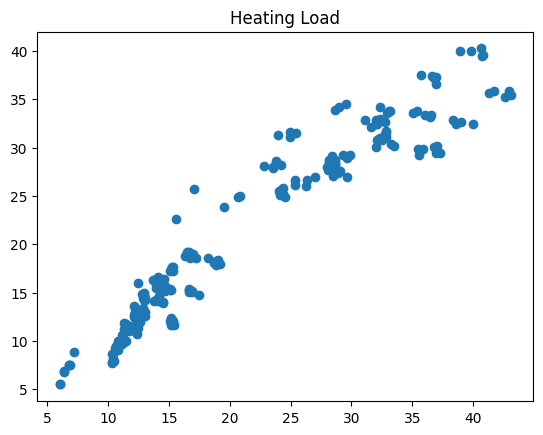

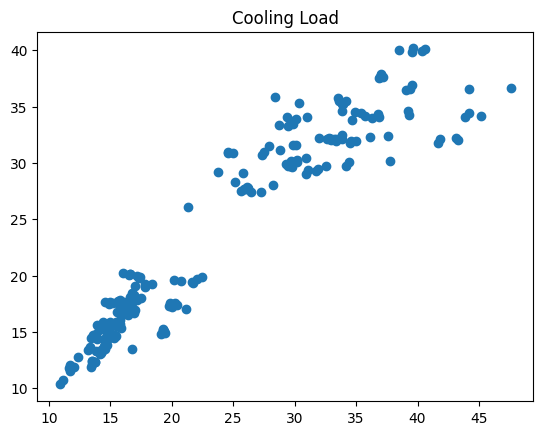

In [37]:
plt.scatter(y_test.iloc[:, 0], predictions[:, 0])
plt.title("Heating Load")
plt.show()

plt.scatter(y_test.iloc[:, 1], predictions[:, 1])
plt.title("Cooling Load")
plt.show()


The plots seems to be following a diagonal lines showing that model is relatively performing well
There are some clusters showing that there are some buildings in the dataset with distinct structures.

**Metrics**

In [38]:
#heating load metrics

# MAE - Mean average error
print("Heating Load Metrics:")
print("\nMAE")
print(round(metrics.mean_absolute_error(y_test.iloc[:, 0], predictions[:, 0]), 2))

# MSE - Mean square error
print("\nMSE")
print(round(metrics.mean_squared_error(y_test.iloc[:, 0], predictions[:, 0]), 2))

# RMSE - Root mean square error
print('\nRMSE:')
print(round(np.sqrt(metrics.mean_squared_error(y_test.iloc[:, 0], predictions[:, 0])), 2))

# R-squared. 0 =bad  1 =good
print('\nR-squared:')
print(round(metrics.r2_score(y_test.iloc[:, 0], predictions[:, 0]), 2))

#Cooling load metrics

# MAE - Mean average error
print("\nCooling Load Metrics:")
print("\nMAE")
print(round(metrics.mean_absolute_error(y_test.iloc[:, 1], predictions[:, 1]), 2))

# MSE - Mean square error
print("\nMSE")
print(round(metrics.mean_squared_error(y_test.iloc[:, 1], predictions[:, 1]), 2))

# RMSE - Root mean square error
print('\nRMSE:')
print(round(np.sqrt(metrics.mean_squared_error(y_test.iloc[:, 1], predictions[:, 1])), 2))

# R-squared. 0 =bad  1 =good
print('\nR-squared:')
print(round(metrics.r2_score(y_test.iloc[:, 1], predictions[:, 1]), 2))


Heating Load Metrics:

MAE
1.9

MSE
7.42

RMSE:
2.72

R-squared:
0.93

Cooling Load Metrics:

MAE
2.05

MSE
9.15

RMSE:
3.02

R-squared:
0.9


The metrics show us that the model is performing well MAE shows that the predictions are not that off and small gap between MAE and RMSE shows that there are no extreme outliers. R-squared shows that model is working good cooling load predictions are slightly lower but still good enough.

In [39]:
df.tail()

,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_distribution,heating_load,cooling_load
763,0.64,784.0,343.0,220.5,3.5,5.0,0.4,5.0,17.88,21.40
764,0.62,808.5,367.5,220.5,3.5,2.0,0.4,5.0,16.54,16.88
765,0.62,808.5,367.5,220.5,3.5,3.0,0.4,5.0,16.44,17.11
766,0.62,808.5,367.5,220.5,3.5,4.0,0.4,5.0,16.48,16.61
767,0.62,808.5,367.5,220.5,3.5,5.0,0.4,5.0,16.64,16.03


**Prediction Test with Sample Data**

In [40]:
sample = pd.DataFrame({
    'relative_compactness': [0.64],
    'surface_area': [784.0],
    'wall_area': [343.0],
    'roof_area': [220.5],
    'overall_height': [3.5],
    'orientation': [5.0],
    'glazing_area': [0.4],
    'glazing_area_distribution': [5.0]
})

prediction = model.predict(sample)

print(f"Heating Load: {prediction[0][0]:.2f}")
print(f"Cooling Load: {prediction[0][1]:.2f}")


Heating Load: 18.49
Cooling Load: 19.90


**Correlation Matrix**

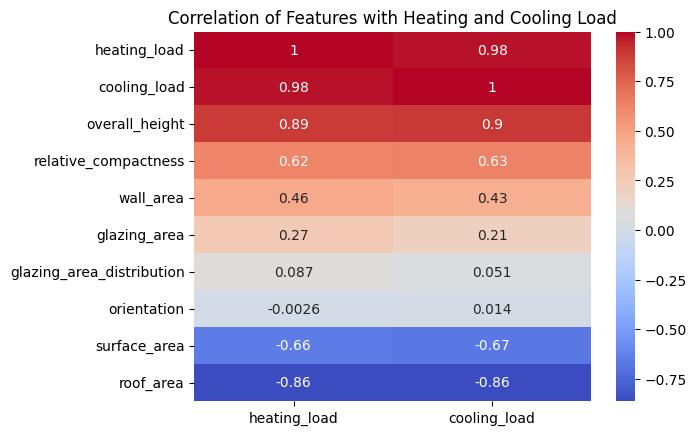

In [ ]:
# Correlation matrix to find out the features emphasizing predictions
corr = df.corr()

# Visualizing correlation matrix
sns.heatmap(corr[['heating_load', 'cooling_load']].sort_values(by='heating_load', ascending=False), annot=True, cmap='coolwarm')
plt.title('Correlation of Features with Heating and Cooling Load')
plt.show()


The correlation matrix shows us that some features such as overall height and roof area are the most impactful features which makes sense as more height and area adds to more heating/cooling load. There are some features with minimal impact such as orientation and glazing area distribution too

**Testing how different features emphasized in correlation matrix impacts predictions**

In [42]:
#ChatGPT was used to figure out how to input multiple samples and get predictions for multiple outputs

# Predictions with higher values of impactful features
high_load_samples = pd.DataFrame({
    'relative_compactness': [0.95, 0.9],
    'surface_area': [400, 450],
    'wall_area': [270, 320],
    'roof_area': [150, 160],
    'overall_height': [8.0, 8.5],
    'orientation': [2, 3],
    'glazing_area': [0.1, 0.15],
    'glazing_area_distribution': [3, 4] 
})

# Predictions with lower values of impactful features
low_load_samples = pd.DataFrame({
    'relative_compactness': [0.6, 0.65],
    'surface_area': [900, 950],
    'wall_area': [270, 320],
    'roof_area': [300, 320],
    'overall_height': [5.0, 5.5],
    'orientation': [2, 3],
    'glazing_area': [0.05, 0.1],
    'glazing_area_distribution': [3, 4]
})

print("High Load Predictions:")
high_preds = model.predict(high_load_samples)
for i, pred in enumerate(high_preds):
    print(f"Sample {i+1}: \nHeating Load = {pred[0]:.2f}\nCooling Load = {pred[1]:.2f}")

print("\nLow Load Predictions:")
low_preds = model.predict(low_load_samples)
for i, pred in enumerate(low_preds):
    print(f"Sample {i+1}: \nHeating Load = {pred[0]:.2f}\nCooling Load = {pred[1]:.2f}")


High Load Predictions:
Sample 1: 
Heating Load = 35.47
Cooling Load = 38.68
Sample 2: 
Heating Load = 40.12
Cooling Load = 42.56

Low Load Predictions:
Sample 1: 
Heating Load = 5.88
Cooling Load = 9.61
Sample 2: 
Heating Load = 3.76
Cooling Load = 6.22


This proves that when high impact feature values are high it results in high loads and vice versa

**Exporting Linear Regression Model**

In [43]:
from joblib import dump
dump(model, "linearreg1.joblib")

['linearreg1.joblib']

**Summary**

We have imported all the libraries first then we imported the data and checked for duplicates and misssing values and after that we split data and trained the linear regression model and lastly we tested it out and found out correlation between different features

Linear regression can be used in real life such as Energy efficiency, Real estate and Sales to predict on the basis of historical trend which can be used to optimise better efficiency or more sales.

This Excercise was fairly easy the dataset was pretty clean so it was quite straight forward. I had to figure out how to work with multiple targets which was a new thing for me.

We could optimise this better by taking out the low impact features from dataset to remove noise and get more accurate predictions. There were also some clusters seen through plots we could also divide both groups to make it more precise.